In [1]:
import cv2
from IPython.display import display, HTML
import glob
try:
    import Image
except ImportError:
    from PIL import Image
import numpy as np

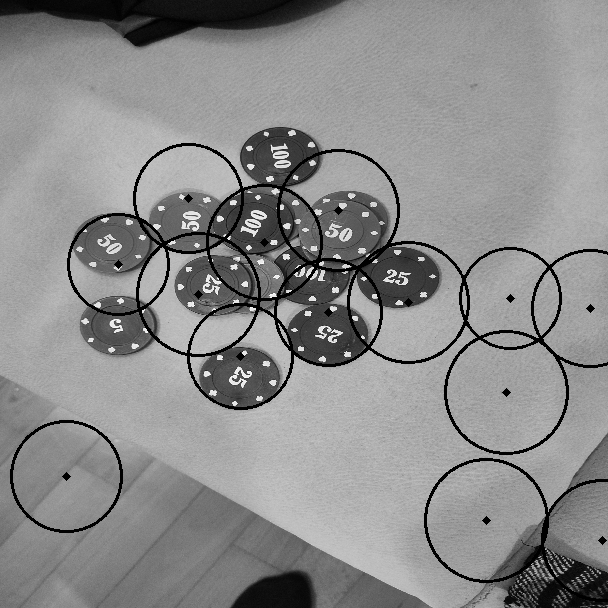

In [51]:
for file in glob.glob('./circles/*.jpg'):
    circle_img = cv2.imread(file, cv2.IMREAD_COLOR)
    circle_img = cv2.cvtColor(circle_img, cv2.COLOR_BGR2GRAY)
    dim = (608, 608)
    circle_img = cv2.resize(circle_img, dim) 
    param = dict(dp=1, minDist=75, param1=75, param2=15, minRadius=50, maxRadius=62)
    
    circles = cv2.HoughCircles(circle_img, cv2.HOUGH_GRADIENT, **param)
    
    if circles is not None:
        circles = np.uint16(np.around(circles))

        for i in circles[0, :]:
            cv2.circle(circle_img,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.circle(circle_img,(i[0],i[1]),2,(0,0,255),3)

    display(Image.fromarray(circle_img))
    break

In [2]:
import pytesseract

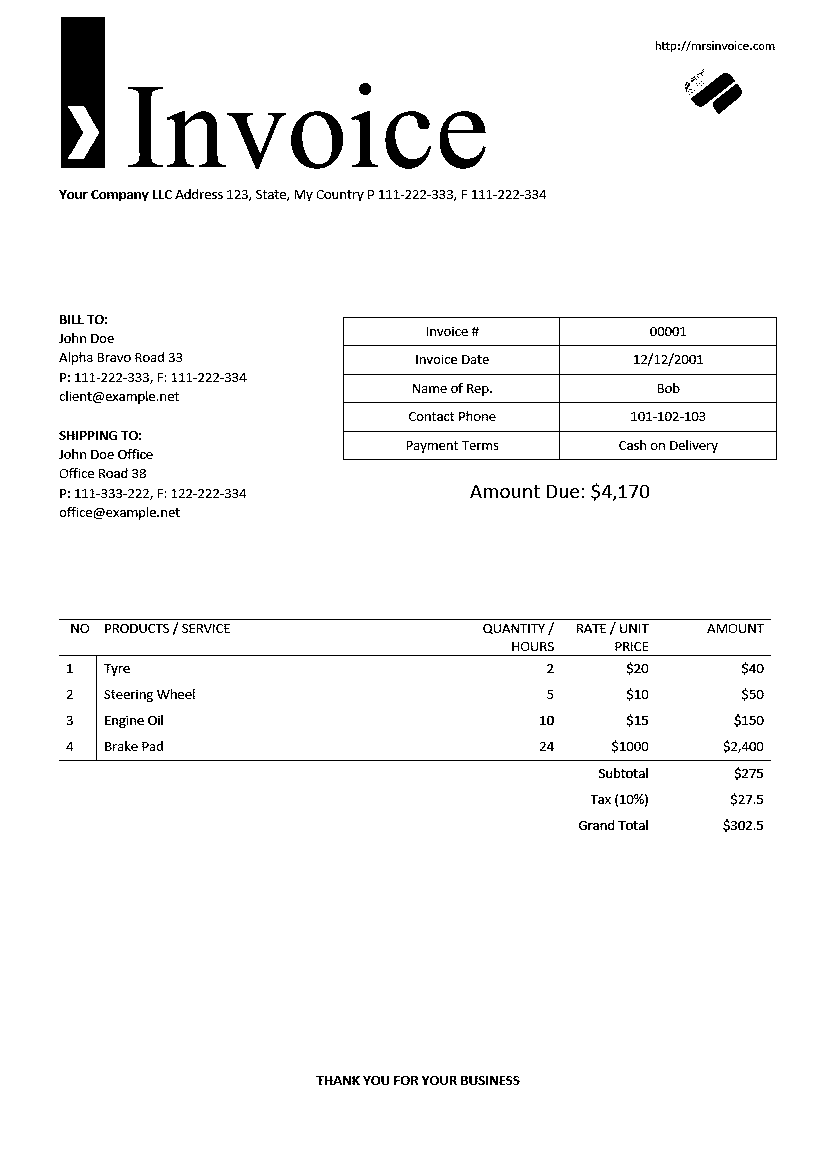

> Invoice

Your Company LLC Address 123, State, My Country P 111-222-383, F 111-222-384

BILL TO:
John Doe

Alpha Bravo Road 33

P: 111-222-338, F: 111-222-384
client@example.net

SHIPPING TO:
John Doe Office

Office Road 38

P:111-333-222, F: 122-227-884
office@example.net

bhetp://mrsinvoice.com

 

 

 

 

 

Invoice # 00001
Invoice Date 12/12/2003
Name of Rep. Bob

Contact Phone 101-102-103

 

Payment Terms

 

 

Cash on Delivery

 

 

Amount Due: $4,170

 

 

 

 

NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT
HOURS, PRICE

1 [tyre 2 $20 $40

2 | Steering Wheet 5 $10 $50

3 | Engine oil 40 $15 $150

4 | Brake Pad 2a $1000 $2,400

Subtotal $275

Tax (10%) $275

Grand Total $302.5

‘THANK YOU FOR YOUR BUSINESS



In [21]:
for file in glob.glob('./circles/*.jpg'):
    circle_img = cv2.imread(file, cv2.IMREAD_COLOR)
    
#     dim = (608, 608)
#     circle_img = cv2.resize(circle_img, dim)
    
    circle_img = cv2.cvtColor(circle_img, cv2.COLOR_BGR2GRAY)
    
    circle_img = cv2.medianBlur(circle_img,1)
    
    circle_img = cv2.threshold(circle_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
#     circle_img = cv2.Canny(circle_img, 100, 200)
#     circle_img = cv2.cvtColor(circle_img, cv2.COLOR_BGR2GRAY)
    
    
    display(Image.fromarray(circle_img))
    str_ = pytesseract.image_to_string(circle_img)
    print(str_)
#     break 

In [26]:
# for file in glob.glob('./circles/*.png'):
#     pass
# #     circle_img = cv2.imread(file, cv2.IMREAD_COLOR)
# #     display(Image.fromarray(circle_img))

In [38]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [107]:
img1 = glob.glob('./circles/*.png')[0]
img2 = glob.glob('./circles/*.png')[1]

img1 = cv2.imread(img1, cv2.IMREAD_COLOR)
img1 = cv2.resize(img1, None, fx=0.25, fy=0.25)

img2 = cv2.imread(img2, cv2.IMREAD_COLOR)
# img2 = cv2.resize(img2, None, fx=0.25, fy=0.25)

In [108]:
seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect BBs
    iaa.Affine(
        scale=(0.5, 0.7)
    ) # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs
])

scaleBg=  iaa.Resize({"height": 608, "width": 608})

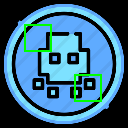

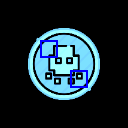

In [109]:
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=25, y1=25, x2=50, y2=50),
    BoundingBox(x1=75, y1=75, x2=100, y2=100)
], shape=img1.shape)

img1_f = bbs.draw_on_image(img1, size=2)
display(Image.fromarray(img1_f))

img1_aug, bbs_aug = seq(image=img1, bounding_boxes=bbs)

img1_f = bbs_aug.draw_on_image(img1_aug, size=2, color=[0, 0, 255])
display(Image.fromarray(img1_f))

In [98]:
# https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
def overlay_image_alpha(img, img_overlay, x, y, alpha_mask):
    """Overlay `img_overlay` onto `img` at (x, y) and blend using `alpha_mask`.

    `alpha_mask` must have same HxW as `img_overlay` and values in range [0, 1].
    """
    # Image ranges
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])

    # Overlay ranges
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    # Blend overlay within the determined ranges
    img_crop = img[y1:y2, x1:x2]
    img_overlay_crop = img_overlay[y1o:y2o, x1o:x2o]
    alpha = alpha_mask[y1o:y2o, x1o:x2o, np.newaxis]
    alpha_inv = 1.0 - alpha

    img_crop[:] = alpha * img_overlay_crop + alpha_inv * img_crop

In [113]:
img2_f = scaleBg.augment_image(img2)
# img2_mask = img2_f[:,:,3]
print(img1.shape)
alpha_mask = img1[:, :, 3] / 255.0
# img_result = img[:, :, :3].copy()
# img_overlay = img_overlay_rgba[:, :, :3]

# xd = overlay_image_alpha(img_result, img_overlay, x, y, alpha_mask)




# display(Image.fromarray(xd))

(128, 128, 3)


IndexError: index 3 is out of bounds for axis 2 with size 3